In [2]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import sys
print(sys.executable)

/usr/bin/python3


In [4]:
!/usr/bin/python3 -m pip install --user --upgrade openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
!pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
highdicom 0.25.1 requires pydicom>=3.0.1, but you have pydicom 3.0.0 which is incompatible.
monailabel-weekly 0.5.dev2340 requires filelock==3.11.0, but you have filelock 3.16.0 which is incompatible.
monailabel-weekly 0.5.dev2340 requires httpx==0.23.3, but you have httpx 0.28.1 which is incompatible.
monailabel-weekly 0.5.dev2340 requires monai[fire,gdown,ignite,itk,lmdb,mlflow,nibabel,openslide

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import openpyxl
import warnings

import os
print(os.getcwd())

import openpyxl
print(openpyxl.__file__)

/home/tct-bii
/home/tct-bii/.local/lib/python3.10/site-packages/openpyxl/__init__.py


In [10]:
data = pd.read_excel("/home/tct-bii/Desktop/datanalysis.xlsx")

data.head()

,ERAS-ID,Date of primary operation,Area of surgery,P-POSSUM scoring,Age,Gender,Weight 6 months prior to admission,Preoperative body weight,Preoperative weight change,Height,...,MuscleMedianHU,MuscleStdHU,MuscleMinHU,MuscleMaxHU,Totalfatcc,Totalfatareamm2,SSATPerc,DSATPerc,VATPerc,MusclePerc
0,108750,2016-03-05,Colorectal and small bowel,Yes,75,Male,Unknown,65.5,NaN,167,...,41.0,34.883006,-128.0,153.0,95.699314,31899.771309,17.059574,13.089611,44.158240,25.692575
1,108751,2016-03-07,Colorectal and small bowel,Yes,57,Male,Unknown,73.3,NaN,165,...,41.0,25.929233,-109.0,134.0,125.112970,41704.323242,19.267011,9.140925,46.106530,25.485535
2,108753,2016-03-18,Colorectal and small bowel,Yes,77,Male,Unknown,51,NaN,158,...,49.0,29.192904,-124.0,200.0,43.777677,14592.559082,20.399938,7.471710,32.048187,40.080165
3,108754,2016-03-18,Colorectal and small bowel,Yes,72,Male,Unknown,57.6,NaN,162,...,31.0,30.194501,-104.0,126.0,62.655785,20885.261719,27.608617,9.827063,32.096492,30.467828
4,108756,2016-03-21,Colorectal and small bowel,Yes,63,Male,Unknown,63.2,NaN,161,...,37.0,29.299285,-164.0,166.0,98.775247,32925.082214,12.523333,7.930021,51.707394,27.839252


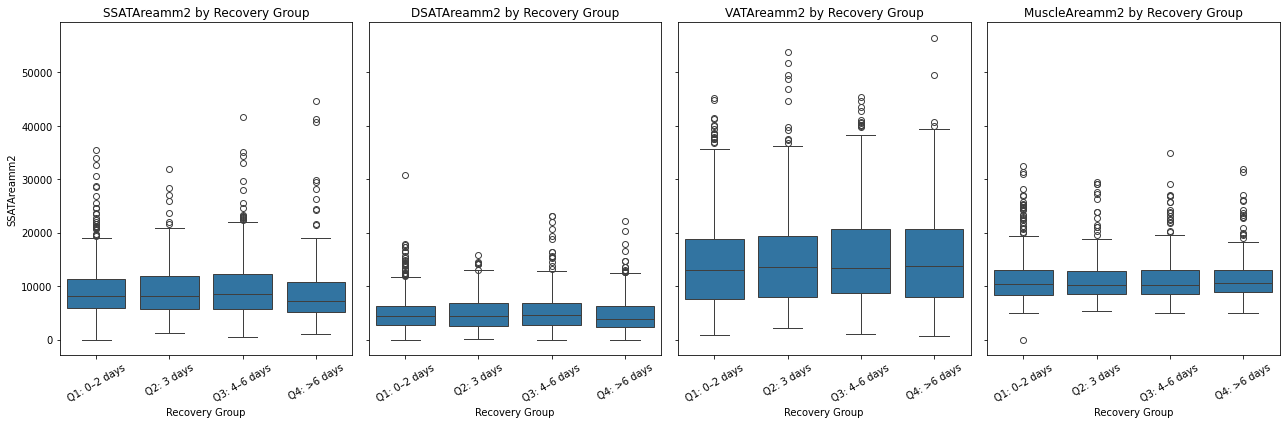

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Step 2: Define relevant columns ===
area_cols = ['SSATAreamm2', 'DSATAreamm2', 'VATAreamm2', 'MuscleAreamm2']
outcome_col = 'Time to recovery of ADL ability (nights)'

# === Step 3: Subset and clean ===
subset = data[area_cols + [outcome_col]].dropna()

# === Step 4: Define quartile bins manually from real cutoffs ===
bin_edges = [0, 2, 3, 6, 133]
labels = ['Q1: 0–2 days', 'Q2: 3 days', 'Q3: 4–6 days', 'Q4: >6 days']

subset['RecoveryGroup'] = pd.cut(
    subset[outcome_col],
    bins=bin_edges,
    labels=labels,
    include_lowest=True,
    right=True
)

# === Step 5: Plot boxplots with same y-axis ===
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

for i, col in enumerate(area_cols):
    sns.boxplot(x='RecoveryGroup', y=col, data=subset, ax=axes[i])
    axes[i].set_title(f'{col} by Recovery Group')
    axes[i].set_xlabel('Recovery Group')
    axes[i].set_ylabel(col if i == 0 else "")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


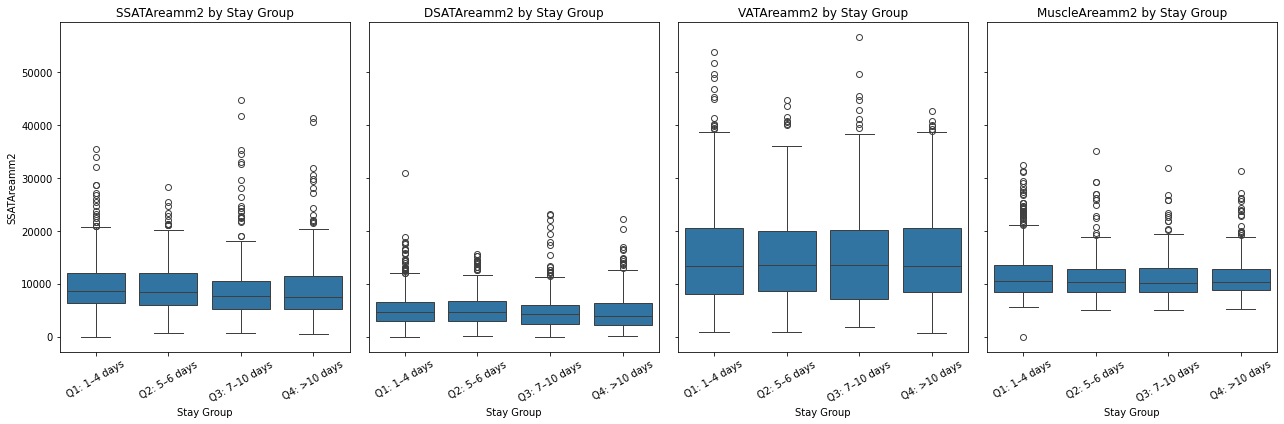

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Step 2: Define relevant columns ===
area_cols = ['SSATAreamm2', 'DSATAreamm2', 'VATAreamm2', 'MuscleAreamm2']
outcome_col = 'Length of stay (nights in hospital after primary operation)'

# === Step 3: Subset and clean ===
subset = data[area_cols + [outcome_col]].dropna()

# === Step 4: Define quartile bins based on actual distribution ===
qcut_result, bin_edges = pd.qcut(subset[outcome_col], q=4, retbins=True, duplicates='drop')
labels = [
    f'Q1: {int(bin_edges[0])}–{int(bin_edges[1])} days',
    f'Q2: {int(bin_edges[1]) + 1}–{int(bin_edges[2])} days',
    f'Q3: {int(bin_edges[2]) + 1}–{int(bin_edges[3])} days',
    f'Q4: >{int(bin_edges[3])} days'
]

subset['StayGroup'] = pd.cut(
    subset[outcome_col],
    bins=bin_edges,
    labels=labels,
    include_lowest=True,
    right=True
)

# === Step 5: Plot boxplots with same y-axis ===
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

for i, col in enumerate(area_cols):
    sns.boxplot(x='StayGroup', y=col, data=subset, ax=axes[i])
    axes[i].set_title(f'{col} by Stay Group')
    axes[i].set_xlabel('Stay Group')
    axes[i].set_ylabel(col if i == 0 else "")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

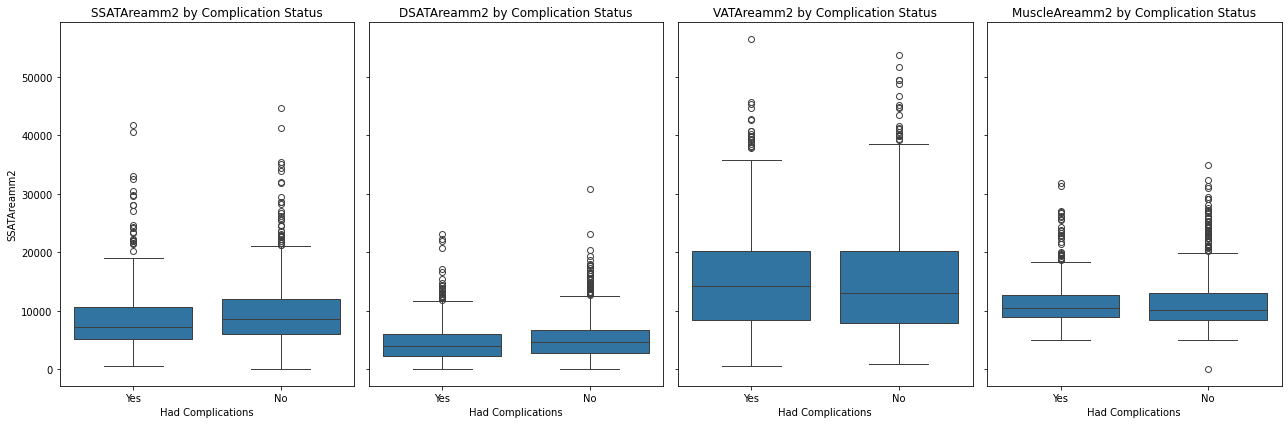

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Define area and outcome columns ===
area_cols = ['SSATAreamm2', 'DSATAreamm2', 'VATAreamm2', 'MuscleAreamm2']
outcome_col = 'Complications at all during primary stay'

# === Step 2: Subset and clean data ===
subset = data[area_cols + [outcome_col]].dropna()

# === Step 3: Standardize outcome values (e.g., Yes/No) ===
subset[outcome_col] = subset[outcome_col].astype(str).str.strip().str.capitalize()

# === Step 4: Plot boxplots with shared y-axis ===
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

for i, col in enumerate(area_cols):
    sns.boxplot(x=outcome_col, y=col, data=subset, ax=axes[i])
    axes[i].set_title(f'{col} by Complication Status')
    axes[i].set_xlabel('Had Complications')
    axes[i].set_ylabel(col if i == 0 else "")
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

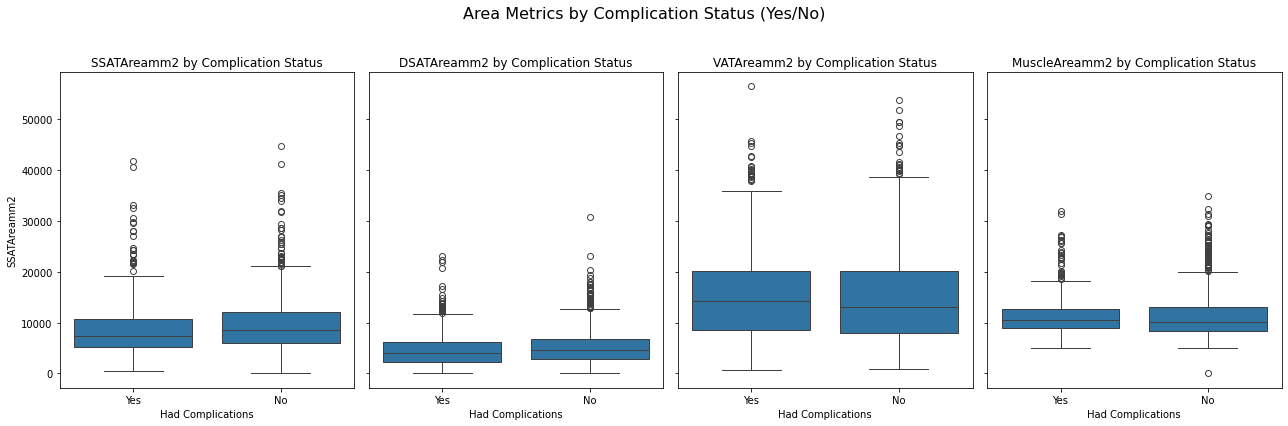

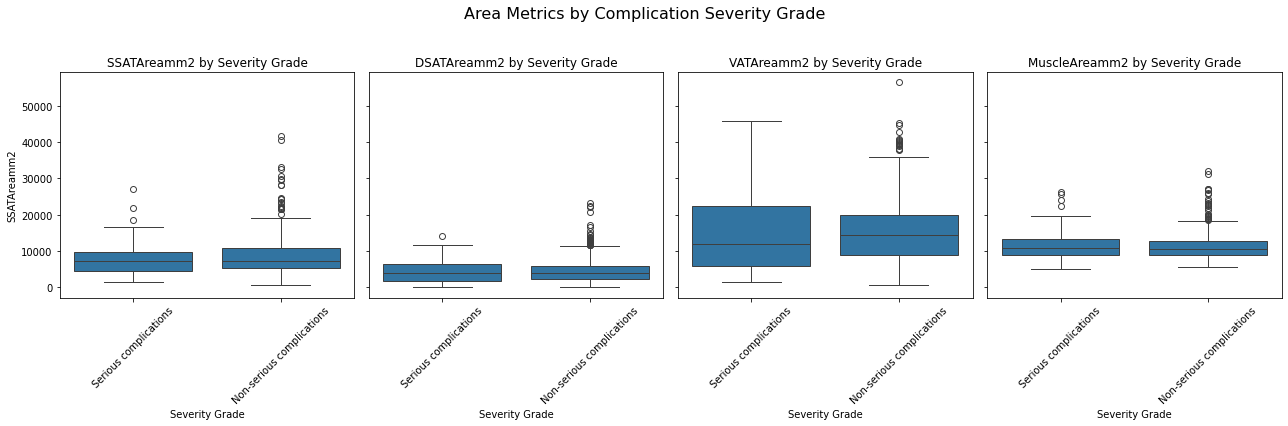

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Area metric columns ===
area_cols = ['SSATAreamm2', 'DSATAreamm2', 'VATAreamm2', 'MuscleAreamm2']

# === 1. Plot by Complication Status (Yes/No) ===
outcome_binary = 'Complications at all during primary stay'
subset1 = data[area_cols + [outcome_binary]].dropna()
subset1[outcome_binary] = subset1[outcome_binary].astype(str).str.strip().str.capitalize()

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
for i, col in enumerate(area_cols):
    sns.boxplot(x=outcome_binary, y=col, data=subset1, ax=axes[i])
    axes[i].set_title(f'{col} by Complication Status')
    axes[i].set_xlabel('Had Complications')
    axes[i].set_ylabel(col if i == 0 else "")
    axes[i].tick_params(axis='x', rotation=0)
plt.suptitle('Area Metrics by Complication Status (Yes/No)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# === 2. Plot by Complication Severity Grade ===
outcome_severity = 'Complication severity grade'
subset2 = data[area_cols + [outcome_severity]].dropna()
subset2[outcome_severity] = subset2[outcome_severity].astype(str).str.strip()

# Optional: Sort grades logically (e.g., Grade I, II, IIIa...)
ordered_grades = sorted(subset2[outcome_severity].unique(), key=lambda x: (len(x), x))
subset2[outcome_severity] = pd.Categorical(subset2[outcome_severity], categories=ordered_grades, ordered=True)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
for i, col in enumerate(area_cols):
    sns.boxplot(x=outcome_severity, y=col, data=subset2, ax=axes[i])
    axes[i].set_title(f'{col} by Severity Grade')
    axes[i].set_xlabel('Severity Grade')
    axes[i].set_ylabel(col if i == 0 else "")
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle('Area Metrics by Complication Severity Grade', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


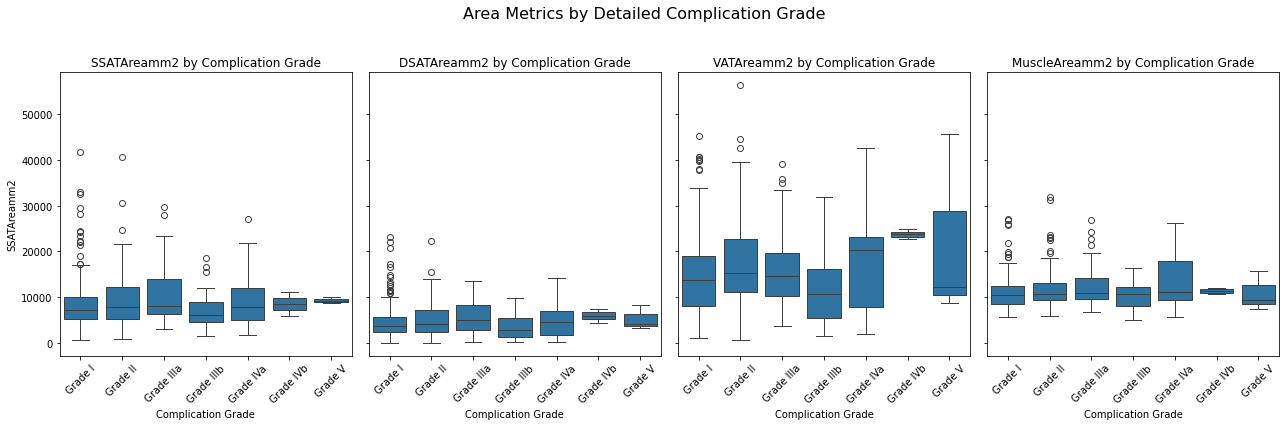

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Area metric columns
area_cols = ['SSATAreamm2', 'DSATAreamm2', 'VATAreamm2', 'MuscleAreamm2']
outcome_grading = 'Grading of most severe complication'

# Subset & clean
subset = data[area_cols + [outcome_grading]].dropna()
subset = subset[subset[outcome_grading].str.lower() != 'unknown']

# Order grades logically
grade_order = ['Grade I', 'Grade II', 'Grade IIIa', 'Grade IIIb', 'Grade IVa', 'Grade IVb', 'Grade V']
subset[outcome_grading] = pd.Categorical(subset[outcome_grading], categories=grade_order, ordered=True)

# Plot with shared y-axis
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
for i, col in enumerate(area_cols):
    sns.boxplot(x=outcome_grading, y=col, data=subset, ax=axes[i])
    axes[i].set_title(f'{col} by Complication Grade')
    axes[i].set_xlabel('Complication Grade')
    axes[i].set_ylabel(col if i == 0 else "")
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Area Metrics by Detailed Complication Grade', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


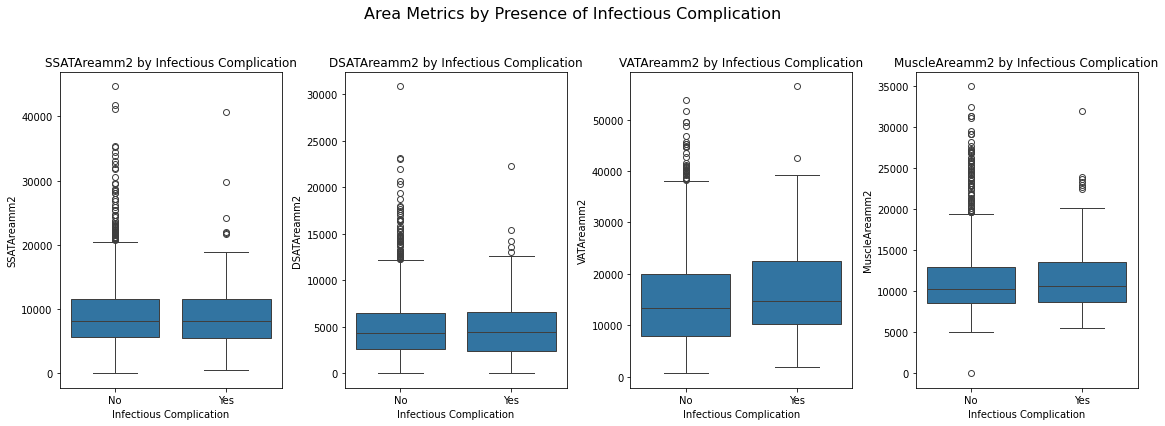

Bad pipe message: %s [b'\xee\x10\xf2G{\x8e\xdc\xa2\xcb\xe4\xbe\xb2\x7f\xa2\r\xd3\xea\xd6\x00\x02\xbc\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00\x1e\x00\x1f\x00 \x00!\x00"\x00#\x00$\x00%\x00&\x00\'\x00(\x00)\x00*\x00+\x00,\x00-\x00.\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x8a\x00\x8b\x00\x8c\x00\x8d\x00\x8e\x00\x8f\x00\x90\x00\x91\x00\x92\x00\x93\x00\x94\x00\x95\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xa8\x00\xa9\x00\xaa\x00', b'\xac\x00\xad\x00\xae\x00\xaf\x00\xb0\x00\xb1\x00\xb2\x00\xb3\x00\xb4\x00\xb5\x00\xb6\x00\xb7\x00\xb8\x00\xb9\x00\x

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Area metrics
area_cols = ['SSATAreamm2', 'DSATAreamm2', 'VATAreamm2', 'MuscleAreamm2']
outcome_infectious = 'Infectious complication(s)'

# Clean and subset
subset = data[area_cols + [outcome_infectious]].dropna()
subset[outcome_infectious] = subset[outcome_infectious].astype(str).str.strip().str.capitalize()

# Plot
plt.figure(figsize=(16, 6))
for i, col in enumerate(area_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x=outcome_infectious, y=col, data=subset)
    plt.title(f'{col} by Infectious Complication')
    plt.xlabel('Infectious Complication')
    plt.ylabel(col)
    plt.xticks(rotation=0)

plt.suptitle('Area Metrics by Presence of Infectious Complication', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
